# Exercise
Create your first Linear Regression model
Given the following X and y, train a linear model and show the results! Fill in the empty cells to complete the linear regression task.

Fit a linear regression, choose fit_intercept=True
Print the slope and the intercept
Print the Mean Squared Error and the R2 value
Plot the original data points and your regression line
What happend if you use fit_intercept=False

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

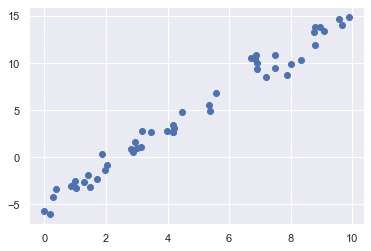

In [3]:
rng = np.random.RandomState(1) # random number generator
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

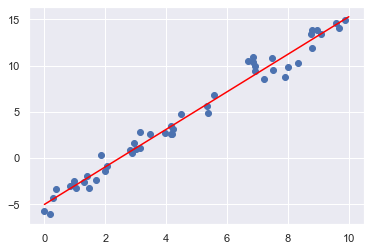

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y) # np.newaxis to ensure it is in array with dimension (numfeatures,1)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [6]:
model.score(x[:, np.newaxis], y)

0.9790800609430612

In [7]:
X_new = np.array([[2.5]])
model.predict(X_new)

array([0.06944494])

In [8]:
# Create a linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True)

In [9]:
# fitting the model to data
model.fit(x[:, np.newaxis], y)

LinearRegression(normalize=True)

In [10]:
# print slope and intercept
print(model.coef_)
print(model.intercept_)

[2.02720881]
-4.998577085553202


In [11]:
# Use the trained model, predict new y values
xfit = np.linspace(0, 10, 50)
yfit = model.predict(xfit[:, np.newaxis])

In [12]:
# print mean squared error and r2_score
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y, yfit))
print(r2_score(y, yfit))

62.09378903093555
-0.58735989521677


In [13]:
# compare to use of score() function.

model.score(x[:,np.newaxis], y)

0.9790800609430612

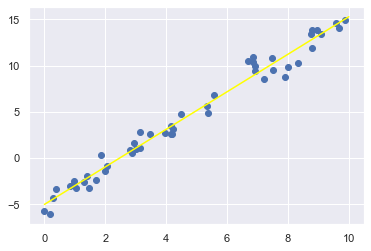

In [14]:
# show a plot with the data points and with the regression line

plt.scatter(x, y)
plt.plot(xfit, yfit,color='yellow')

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # rand() create 3 dimensions of 100 random numbers between 0.0 to 1.0. dimension (100,3)
# y = 1.5x1 -2x2 + 1x3 +0.5
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100) 

X.shape, y.shape

((100, 3), (100,))

In [16]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.9695110045426549
[ 1.51505619 -2.03829977  0.97437175]


# Exercise
Effects of TV, Radio and Newspaper advertising on Sales
Read the csv data from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv where

The features are:

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
and the response is:

Sales: sales of a single product in a given market (in thousands of widgets)
Explore the data and find out the answers for the following questions:

Is there a relationship between ads and sales?
How strong is that relationship?
Which ad types contribute to sales?
What is the effect of each ad type of sales?
Given ad spending in a particular market, can sales be predicted?

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
X = df.TV
y = df.Sales

In [19]:
X = X[:,np.newaxis]

<ipython-input-19-792d2ee4751a>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [20]:
model = LinearRegression(fit_intercept=True)

In [21]:
model.fit(X,y)

LinearRegression()

In [22]:
model.score(X,y)

0.611875050850071

In [23]:
ypred = model.predict(X)

In [24]:
r2_score(y,ypred)

0.611875050850071

Text(0.5, 1.0, 'TV : Actual Sales VS Predicted')

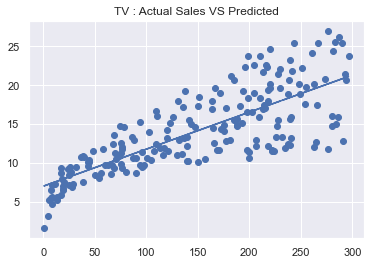

In [25]:
plt.scatter(X, y)
plt.plot(X, ypred)
plt.title('TV : Actual Sales VS Predicted')

In [26]:
print("intercept", model.intercept_)
print("coef", model.coef_)

intercept 7.032593549127693
coef [0.04753664]


In [27]:
def fit_and_plot(name, df, y_col, x_col):
    
    y = df[y_col] # df['sales']
    X = df[x_col]
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X[:,np.newaxis],y)
    ypred = model.predict(X[:,np.newaxis])
    
    print(name)
    print("intercept", model.intercept_)
    print("coef", model.coef_)
    print("R2", r2_score(y, ypred))
    
    plt.scatter(X, y)
    plt.plot(X, ypred)
    plt.show();

Radio Vs Sales
intercept 9.311638095158283
coef [0.20249578]
R2 0.33203245544529525


<ipython-input-27-244f6a25ae6c>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(X[:,np.newaxis],y)
<ipython-input-27-244f6a25ae6c>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ypred = model.predict(X[:,np.newaxis])


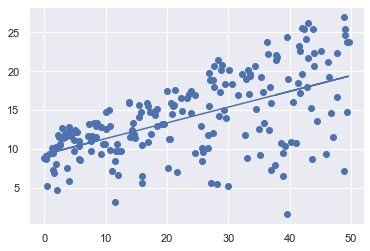

In [28]:
fit_and_plot('Radio Vs Sales', df, 'Sales', 'Radio')

<ipython-input-27-244f6a25ae6c>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(X[:,np.newaxis],y)
<ipython-input-27-244f6a25ae6c>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ypred = model.predict(X[:,np.newaxis])


Newspaper Vs Sales
intercept 12.35140706927816
coef [0.0546931]
R2 0.05212044544430516


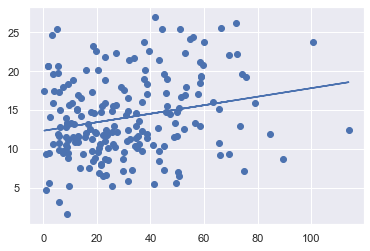

In [29]:
fit_and_plot('Newspaper Vs Sales', df, 'Sales', 'Newspaper')

In [30]:
model = LinearRegression(fit_intercept=True)
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

model.fit(X, y) 
ypred = model.predict(X) 

print('R2', r2_score(y,ypred))
print('intercept', model.intercept_)
print('coef', model.coef_)

R2 0.8972106381789522
intercept 2.9388893694594067
coef [ 0.04576465  0.18853002 -0.00103749]


<ipython-input-31-b4f0214fa2bc>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(df.TV[:,np.newaxis], y)
<ipython-input-31-b4f0214fa2bc>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(df.TV[:,np.newaxis], ypred)


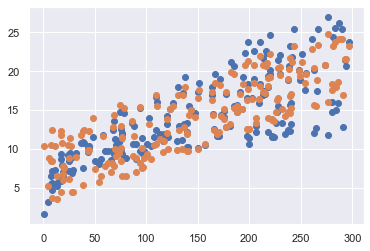

In [31]:
plt.scatter(df.TV[:,np.newaxis], y)
plt.scatter(df.TV[:,np.newaxis], ypred)

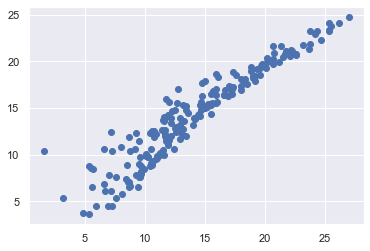

In [35]:
plt.scatter(y, ypred)

<ipython-input-33-aea643587ce4>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(df.TV[:,np.newaxis], y)
<ipython-input-33-aea643587ce4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(df.TV[:,np.newaxis], ypred)
<ipython-input-33-aea643587ce4>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(df.Radio[:,np.newaxis], y)
<ipython-input-33-aea643587ce4>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatt

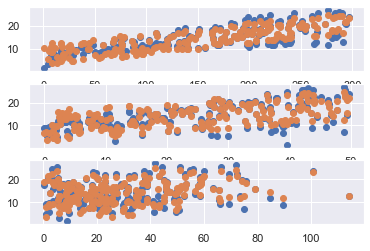

In [33]:
plt.subplot(311)
plt.scatter(df.TV[:,np.newaxis], y)
plt.scatter(df.TV[:,np.newaxis], ypred)

plt.subplot(312)
plt.scatter(df.Radio[:,np.newaxis], y)
plt.scatter(df.Radio[:,np.newaxis], ypred)

plt.subplot(313)
plt.scatter(df.Newspaper[:,np.newaxis], y)
plt.scatter(df.Newspaper[:,np.newaxis], ypred)

In [34]:
model.predict([[100, 25, 25]])

array([12.20266701])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # again, 3 dimensions
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

In [40]:
X.shape, y.shape

((100, 3), (100,))

In [41]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

In [42]:
print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)

(50, 3)
(50,)
(50, 3)
(50,)


In [43]:
lr = LinearRegression().fit(X1,y1)

In [44]:
print(lr.intercept_)
print(lr.coef_)

0.7284773152812565
[ 1.51647123 -2.01681558  0.9433546 ]


In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
y1_pred = lr.predict(X1)
print("R2", r2_score(y1_pred, y1))
print("MSE", mean_squared_error(y1_pred, y1))
print("MAE", mean_absolute_error(y1_pred, y1))

R2 0.9888893165144943
MSE 0.8161515160386734
MAE 0.7065645515165733


In [47]:
y2_pred = lr.predict(X2)
print("R2", r2_score(y2_pred, y2))
print("MSE", mean_squared_error(y2_pred, y2))
print("MAE", mean_absolute_error(y2_pred, y2))

R2 0.9813490019832551
MSE 1.0621138229477767
MAE 0.8747172130028973


In [48]:
print("mean", np.mean(y))

mean 1.3514536319215853


In [49]:
print("std", np.std(y))

std 8.147870679850687


# Explore Scikit Learn's datasets
Sklearn provides us with sample datasets.
Let's do this in class together.

google for sklearn datasets
load diabetes data set
check the keys: 'data', 'target', 'DESCR', 'feature_names'
print description
create X matrix and y vector

In [50]:
from sklearn.datasets import load_diabetes

In [51]:
diabetes = load_diabetes()

In [52]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [53]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [82]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False) # degree of 3, bias can be removed by include_bias=False
poly.fit_transform(x[:,np.newaxis])
poly

PolynomialFeatures(degree=3, include_bias=False)

In [83]:
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [84]:
poly_model.steps[1]

('linearregression', LinearRegression())

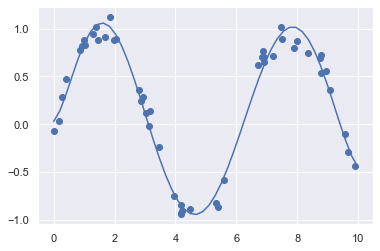

In [85]:
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 50) # generate new x-values
yfit = poly_model.predict(xfit[:, np.newaxis]) # predict the y-values

plt.scatter(x, y)
plt.plot(xfit, yfit); # change the degree from 1 to 7 and check the resulting chart

In [86]:
poly_model.steps[1][1].intercept_

0.028472626020557557

In [87]:
poly_model.steps[1][1].coef_

array([ 0.00000000e+00,  3.31250194e-01,  1.28845778e+00, -1.06474496e+00,
        2.90659230e-01, -3.57011703e-02,  2.01614685e-03, -4.20513337e-05])